<a href="https://colab.research.google.com/github/matheushrq/engdados_python/blob/main/unidade_03_trabalhando_com_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# exemplo: consulta de CEP
import requests

res = requests.get('https://cep.awesomeapi.com.br/json/30140008')
res.json()

{'cep': '30140008',
 'address_type': 'Avenida',
 'address_name': 'Brasil',
 'address': 'Avenida Brasil',
 'state': 'MG',
 'district': 'Savassi',
 'lat': '-19.9322284',
 'lng': '-43.9360312',
 'city': 'Belo Horizonte',
 'city_ibge': '3106200',
 'ddd': '31'}

In [ ]:
# exemplo: consulta de CEP
# validando retorno com ou sem erro
import requests

res = requests.get('https://cep.awesomeapi.com.br/json/30140008')
print(res)
print(res.status_code)

<Response [200]>
200


In [ ]:
# validando com estrutura de repetição
import requests

res = requests.get('https://cep.awesomeapi.com.br/json/30140008')

if(res):
  print("Sucesso!")
else:
  print("Erro!")

In [ ]:
# exemplo: obtendo a cotação do dólar
import requests

res = requests.get('https://economia.awesomeapi.com.br/json/last/USD-BRL')

print(res.text)
print(res.json()['USDBRL']['bid'])

{"USDBRL":{"code":"USD","codein":"BRL","name":"Dólar Americano/Real Brasileiro","high":"5.3448","low":"5.2693","varBid":"-0.0564","pctChange":"-1.057326","bid":"5.2778","ask":"5.2808","timestamp":"1758658587","create_date":"2025-09-23 17:16:27"}}
5.2778


In [ ]:
# exemplo: consultando uma lista de CEP's do Brasil com o ViaCEP
import requests

url = 'https://viacep.com.br/ws'
lista_ceps = ['32341370']
formato = '/json/'
for cep in lista_ceps:
  res = requests.get(url + '/' + cep + formato)
  print(res.json())

{'cep': '32341-370', 'logradouro': 'Rua Tupã', 'complemento': '', 'unidade': '', 'bairro': 'Novo Eldorado', 'localidade': 'Contagem', 'uf': 'MG', 'estado': 'Minas Gerais', 'regiao': 'Sudeste', 'ibge': '3118601', 'gia': '', 'ddd': '31', 'siafi': '4371'}


In [2]:
# Exemplo: Tratando dados retornados pela API
import requests
import pandas as pd

res = requests.get('https://api.sampleapis.com/presidents/presidents')

df = pd.DataFrame(res.json())
df[['inicio', 'fim']] = df.yearsInOffice.str.split('-', expand = True)
df_vice = df.explode('vicePresidents')[['name','vicePresidents']]
df_vice

,name,vicePresidents
0,George Washington,John Adams
1,John Adams,Thomas Jefferson
2,Thomas Jefferson,Aaron Burr
2,Thomas Jefferson,George Clinton
3,James Madison,George Clinton
3,James Madison,Elbridge Gerry
4,James Monroe,Daniel D. Tompkins
5,John Quincy Adams,John C. Calhoun
6,Andrew Jackson,John C. Calhoun
6,Andrew Jackson,Martin Van Buren


In [ ]:
# Exemplo: Obter a última cotação de moedas

import requests

res = requests.get('https://economia.awesomeapi.com.br/last/USD-BRL,EUR-BRL,BTC-BRL')

cotacoes  = res.json()

print(cotacoes)
print(cotacoes['EURBRL']['bid'])

In [4]:
# Exemplo: Obter o fechamento do Dólar dos últimos 30 dias

import requests
import pandas as pd
import datetime
import matplotlib.pyplot as plt

res = requests.get('https://economia.awesomeapi.com.br/json/daily/USD-BRL/30')

cotacoes  = res.json()
cotacoes

[{'code': 'USD',
  'codein': 'BRL',
  'name': 'Dólar Americano/Real Brasileiro',
  'high': '5.3358',
  'low': '5.2903',
  'varBid': '0.0095',
  'pctChange': '0.178618',
  'bid': '5.3282',
  'ask': '5.3312',
  'timestamp': '1759356500',
  'create_date': '2025-10-01 19:08:20'},
 {'high': '5.3387',
  'low': '5.30221',
  'varBid': '-0.004',
  'pctChange': '-0.07515',
  'bid': '5.3187',
  'ask': '5.3217',
  'timestamp': '1759276747'},
 {'high': '5.3656',
  'low': '5.304',
  'varBid': '-0.0248',
  'pctChange': '-0.463765',
  'bid': '5.3227',
  'ask': '5.3257',
  'timestamp': '1759188271'},
 {'high': '5.3486',
  'low': '5.34082',
  'varBid': '0.0014',
  'pctChange': '0.02619',
  'bid': '5.3475',
  'ask': '5.3505',
  'timestamp': '1759103950'},
 {'high': '5.3719',
  'low': '5.32881',
  'varBid': '-0.0176',
  'pctChange': '-0.32813',
  'bid': '5.3461',
  'ask': '5.3561',
  'timestamp': '1758921786'},
 {'high': '5.3707',
  'low': '5.30857',
  'varBid': '0.0337',
  'pctChange': '0.632272',
  'bid

/tmp/ipython-input-2300646193.py:6: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['data'] = pd.to_datetime(df['timestamp'], unit ='s')


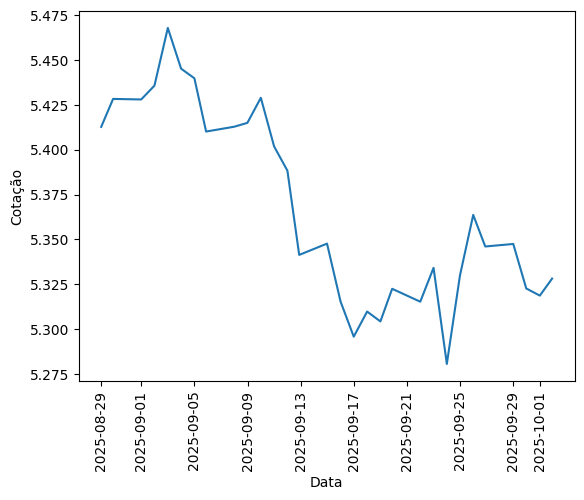

In [5]:
# Exemplo: Plotando um gráfico com o fechamento do Dólar dos últimos 30 dias

df = pd.DataFrame(cotacoes)

df['bid'] = pd.to_numeric(df['bid'])
df['data'] = pd.to_datetime(df['timestamp'], unit ='s')

plt.ylabel("Cotação")
plt.xlabel("Data")
plt.xticks(rotation = 'vertical')

plt.plot(df['data'], df['bid']);

In [ ]:
# Exemplo: Plotando um gráfico com o fechamento do Dólar e Euro dos últimos 30 dias

import requests
import pandas as pd
import datetime
import matplotlib.pyplot as plt

res = requests.get('https://economia.awesomeapi.com.br/json/daily/USD-BRL/30')

cotacoesUSD  = res.json()
cotacoesUSD

df_USD = pd.DataFrame(cotacoesUSD)

df_USD['bid'] = pd.to_numeric(df_USD['bid'])
df_USD['data'] = pd.to_datetime(df_USD['timestamp'], unit ='s')
df_USD

In [ ]:
res = requests.get('https://economia.awesomeapi.com.br/json/daily/EUR-BRL/30')

cotacoesEUR  = res.json()
cotacoesEUR

df_EUR = pd.DataFrame(cotacoesEUR)

df_EUR['bid'] = pd.to_numeric(df_EUR['bid'])
df_EUR['data'] = pd.to_datetime(df_EUR['timestamp'], unit ='s')
df_EUR

In [ ]:
plt.ylabel("Cotação")
plt.xlabel("Data")
plt.xticks(rotation = 'vertical')
plt.plot(df_USD['data'], df_USD['bid'], label = "Dólar")
plt.plot(df_EUR['data'], df_EUR['bid'], label = "Euro");
plt.legend();